#Importing Libraries and dataset

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'randafer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4944824%2F8324623%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T164603Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D90aa41506e0c6fa1dd8abf0e3cb3554c95301405daaf94d2421b52b7dc10e505dae9bc87de412420c2b381322c9fca8258d90b2727d09e740d3bf9e4e4b13937193e9547c6b559cf7c2f08338f9ebd1b57760cdbaf50ae73ab1e700967915b5206251183bb26c8e9408c6eac23d4081998b0cff43f48f99492fe23dd819d91ba02be1d9954289c89e5f6500509cf5a0a065b705833ba9a6220b99fcf53cbde3f520f25e8b5a958cff2007c84e35336795444abfe83643edc2e1455a2091fe2567ebfb85db959cf89dc7904d0fc5eecc600b97f85a4da2db6546b2e04ba5827bbaff9febf75165f7047aed29c8c72597fd91eb30d58175894f61bba209d8be11c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 85755122 bytes downloaded
Downloaded and uncompressed: randafer
Data source import complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
!pip install visualkeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.utils import plot_model
import visualkeras
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 10.8 MB/s eta 0:00:00


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/randafer/FER/train/fear/Training_15675667.jpg
/kaggle/input/randafer/FER/train/fear/Training_8477832.jpg
/kaggle/input/randafer/FER/train/fear/Training_81971844.jpg
/kaggle/input/randafer/FER/train/fear/PrivateTest_8831137.jpg
/kaggle/input/randafer/FER/train/fear/Training_40559287.jpg
/kaggle/input/randafer/FER/train/fear/Training_39961363.jpg
/kaggle/input/randafer/FER/train/fear/Training_62136805.jpg
/kaggle/input/randafer/FER/train/fear/Training_65140524.jpg
/kaggle/input/randafer/FER/train/fear/Training_45169596.jpg
/kaggle/input/randafer/FER/train/fear/Training_28356172.jpg
/kaggle/input/randafer/FER/train/fear/Training_40792762.jpg
/kaggle/input/randafer/FER/train/fear/Training_9609132.jpg
/kaggle/input/randafer/FER/train/fear/Training_3766457.jpg
/kaggle/input/randafer/FER/train/fear/Training_86689248.jpg
/kaggle/input/randafer/FER/train/fear/Training_93097760.jpg
/kaggle/input/randafer/FER/train/fear/Training_679

#Displaying Images

In [ ]:
picture_size = 48
folder_path="/kaggle/input/randafer/FER"

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + "/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path + "/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/randafer/FER/train'

In [ ]:
import os

# Get the path to the dataset folder
dataset_folder = "/kaggle/input/randafer/FER/train"

# Get a list of all the folders in the dataset folder
folders = os.listdir(dataset_folder)

# Create a dictionary to store the count of images in each folder
image_counts = {}

# Iterate through the folders and count the images in each folder
for folder in folders:
  folder_path = os.path.join(dataset_folder, folder)
  images = os.listdir(folder_path)
  image_counts[folder] = len(images)

# Print the count of images in each folder
for folder, count in image_counts.items():
  print(f"Folder: {folder}, Image count: {count}")


Folder: angry, Image count: 5804
Folder: excited, Image count: 2585
Folder: happy, Image count: 7215
Folder: neutral, Image count: 4965
Folder: surprise, Image count: 4002
Folder: sad, Image count: 4830
Folder: disgust, Image count: 4526
Folder: fear, Image count: 4337
Folder: confused, Image count: 2534


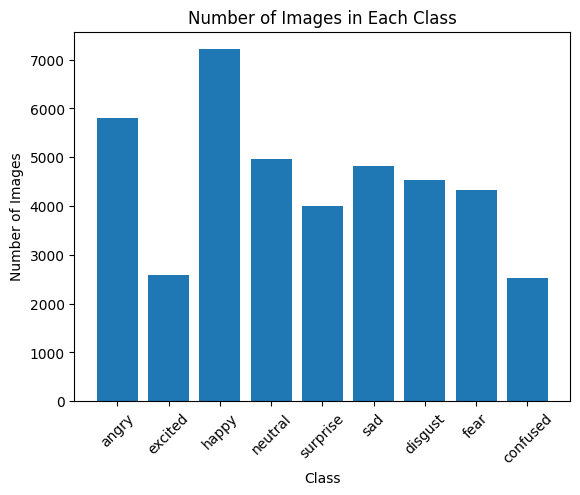

In [ ]:
import matplotlib.pyplot as plt

# Get the list of folders
folders = list(image_counts.keys())

# Get the count of images in each folder
counts = list(image_counts.values())

# Create a bar chart
plt.bar(folders, counts)

# Add title and labels
plt.title("Number of Images in Each Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

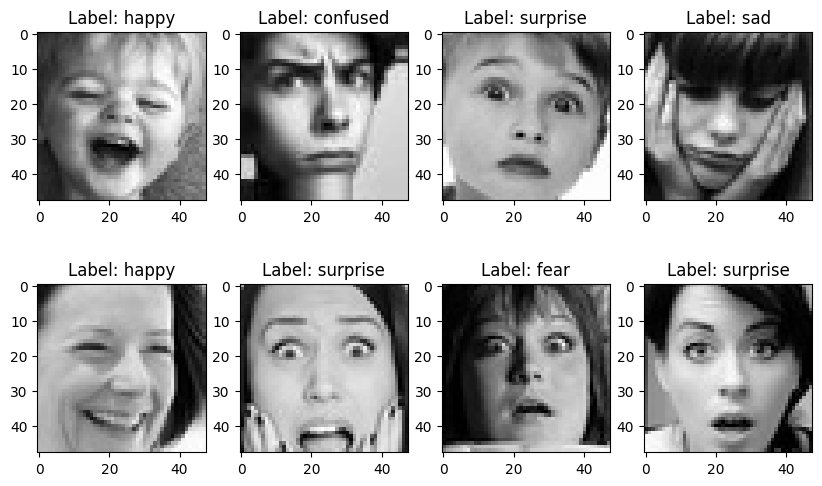

In [ ]:
import matplotlib.pyplot as plt

batch_x, batch_y = train_set.next()
plt.figure(figsize=(10, 6))
for j in range(8):
    plt.subplot(2, 4, j + 1)
    plt.imshow(batch_x[j].reshape(48, 48), cmap='gray')
    plt.title(f"Label: {list(train_set.class_indices.keys())[np.argmax(batch_y[j])]}")
plt.show()

#CNN Model

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 9

cnn_model = Sequential()

#1st CNN layer
cnn_model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('tanh'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#2nd CNN layer
cnn_model.add(Conv2D(128,(5,5),padding = 'same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#3rd CNN layer
cnn_model.add(Conv2D(512,(3,3),padding = 'same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

cnn_model.add(Flatten())

#Fully connected 1st layer
cnn_model.add(Dense(256))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))

cnn_model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0001)
cnn_model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       5

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("checkpoint.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0, patience=10,
                               verbose=1, restore_best_weights=True
                               )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=10,
                                        verbose=1,
                                        min_delta=0.0001
                                        )

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

cnn_model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(train_set, steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs=epochs, validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size, callbacks=callbacks_list)

Epoch 1/50
317/318 [============================>.] - ETA: 0s - loss: 1.4009 - accuracy: 0.4876
Epoch 1: val_loss improved from -inf to 2.60803, saving model to checkpoint.h5
318/318 [==============================] - 24s 52ms/step - loss: 1.3997 - accuracy: 0.4880 - val_loss: 2.6080 - val_accuracy: 0.2734 - lr: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


317/318 [============================>.] - ETA: 0s - loss: 0.9804 - accuracy: 0.6385
Epoch 2: val_loss did not improve from 2.60803
318/318 [==============================] - 14s 44ms/step - loss: 0.9805 - accuracy: 0.6385 - val_loss: 1.2403 - val_accuracy: 0.6086 - lr: 0.0010
Epoch 3/50
317/318 [============================>.] - ETA: 0s - loss: 0.7789 - accuracy: 0.7186
Epoch 3: val_loss did not improve from 2.60803
318/318 [==============================] - 14s 44ms/step - loss: 0.7793 - accuracy: 0.7184 - val_loss: 1.0561 - val_accuracy: 0.6283 - lr: 0.0010
Epoch 4/50
317/318 [============================>.] - ETA: 0s - loss: 0.5997 - accuracy: 0.7868
Epoch 4: val_loss did not improve from 2.60803
318/318 [==============================] - 14s 44ms/step - loss: 0.6003 - accuracy: 0.7866 - val_loss: 0.8289 - val_accuracy: 0.7011 - lr: 0.0010
Epoch 5/50
317/318 [============================>.] - ETA: 0s - loss: 0.4155 - accuracy: 0.8599
Epoch 5: val_loss did not improve from 2.60803
3

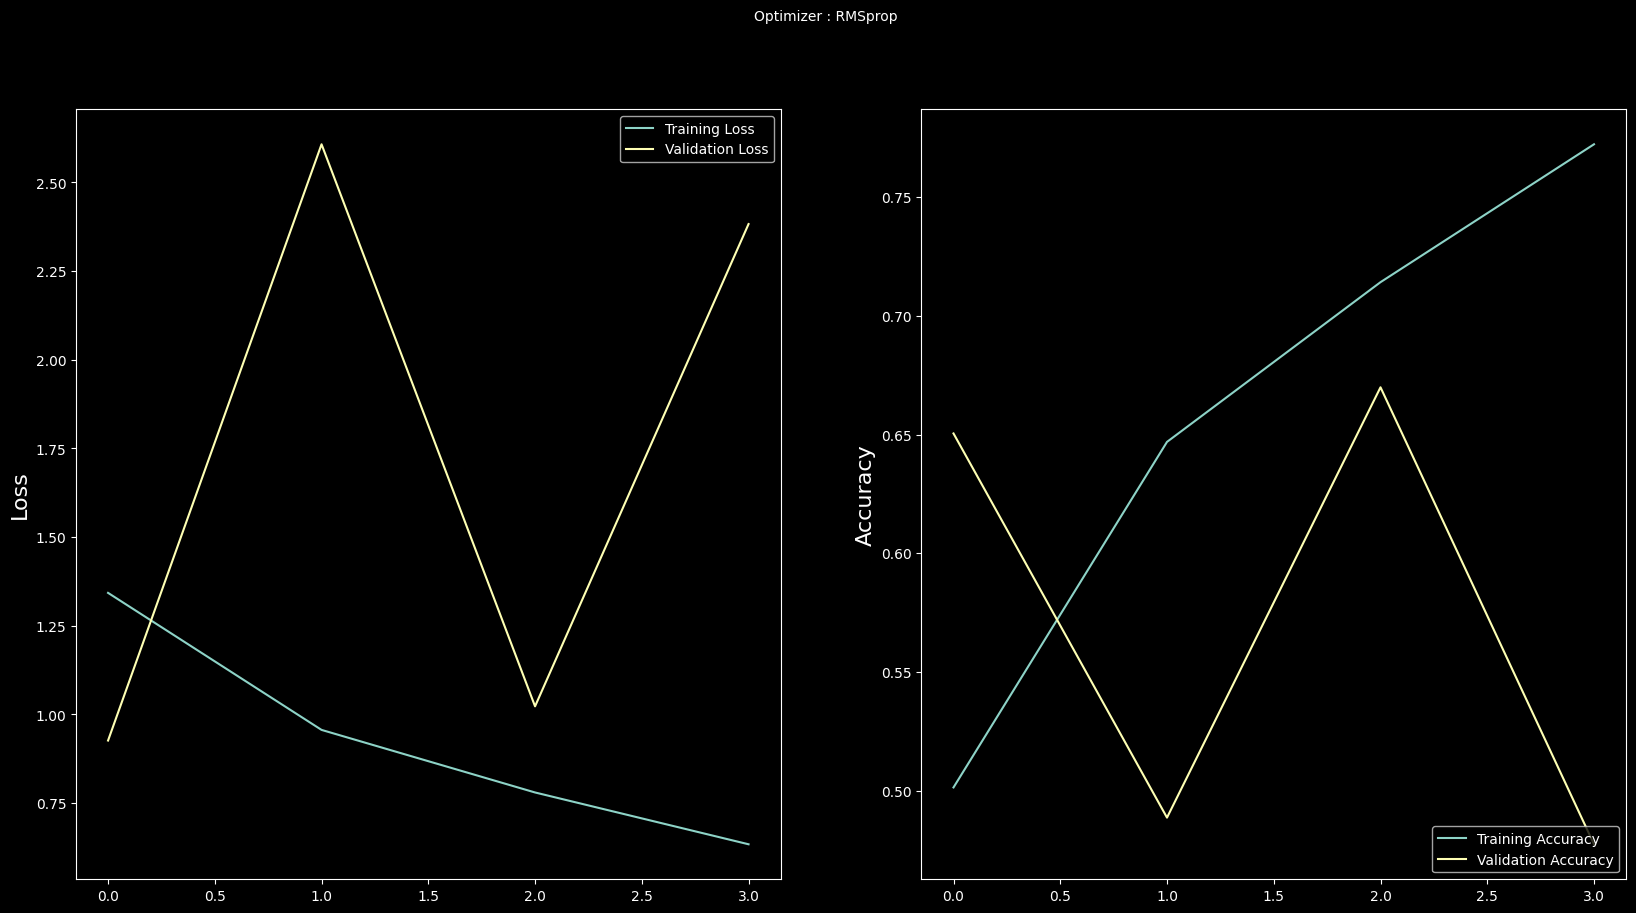

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : RMSprop', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Saving the simple cnn model
cnn_model.save("simple_cnn.h5")

4/4 [==============================] - 0s 3ms/step


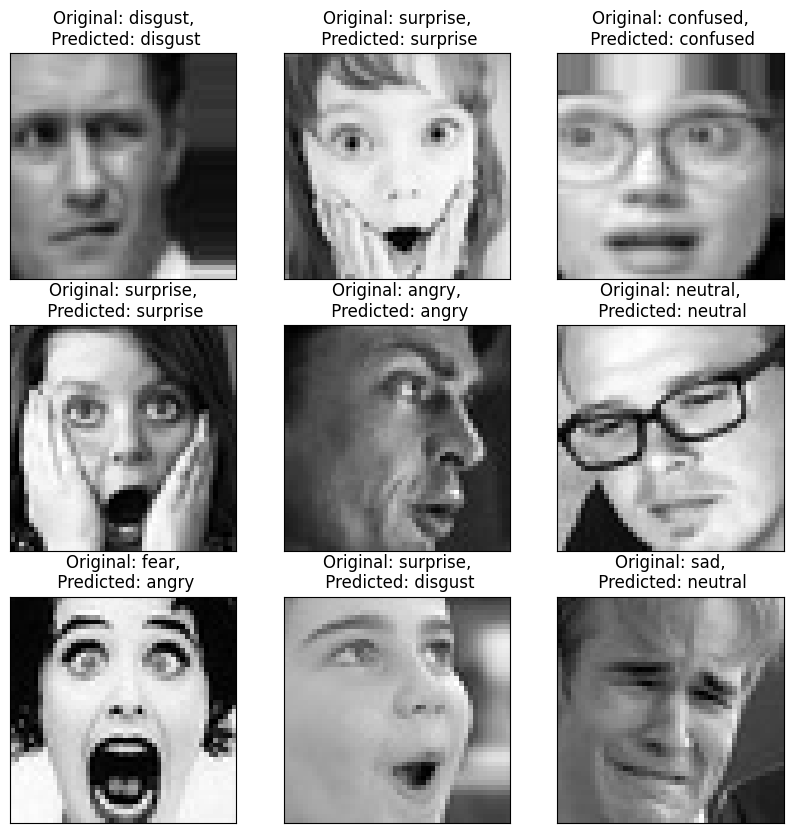

In [ ]:
# Select 9 random images from the train generator
test_images, test_labels = next(train_set)

# Predict the labels of the test images
predicted_labels = cnn_model.predict(test_images)

# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Loop over the test images and predicted labels
for i, ax in enumerate(axes.flat):
  # Display the image
  ax.imshow(test_images[i].reshape((48, 48)), cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])

  # Get the original and predicted labels
  original_label = list(train_set.class_indices.keys())[np.argmax(test_labels[i])]
  predicted_label = list(train_set.class_indices.keys())[np.argmax(predicted_labels[i])]

  # Set the title of the subplot
  ax.set_title(f"Original: {original_label},\n Predicted: {predicted_label}")

# Display the figure
plt.show()

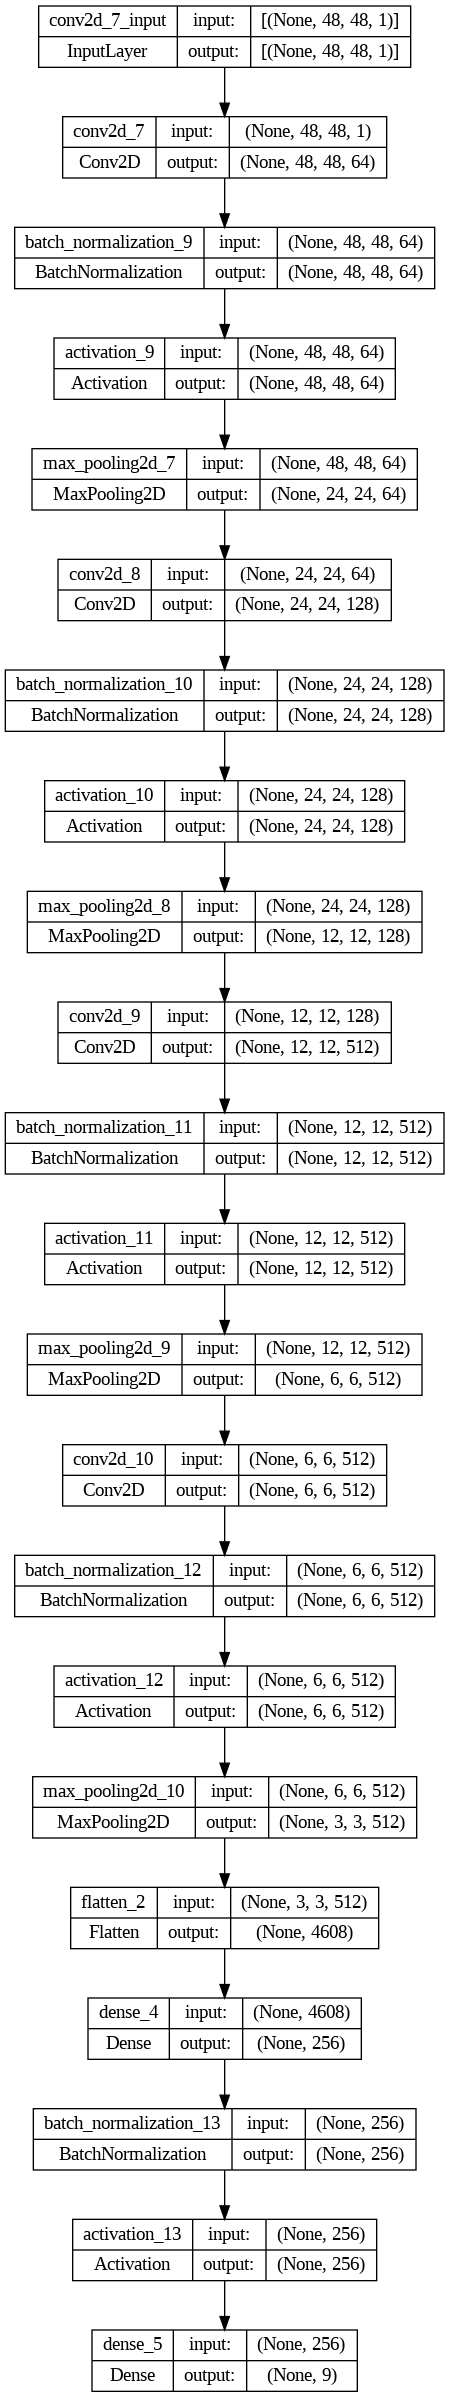

In [ ]:
import numpy as np
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Call the cnn_model with example data
example_input = np.random.rand(128, 48, 48, 1)  # Provide example input
_ = cnn_model(example_input)

# Save the cnn_model architecture as a PNG file
plot_model(cnn_model, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True)



In [ ]:

example_input = np.random.rand(128, 48, 48, 1) # Provide example
_ = cnn_model(example_input)
# Save the cnn_modelel architecture as a PNG file
plot_model(cnn_model, to_file='cnn_modelel_architecture.png',
show_shapes=True, show_layer_names=True)
# Visualize the cnn_modelel
visualkeras.layered_view(cnn_model, to_file='cnn_modelel_architecture.png',
legend=True,).show()



#Fine Tuned CNN Model

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 9

cnn_model = Sequential()

#1st CNN layer
cnn_model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#2nd CNN layer
cnn_model.add(Conv2D(128,(5,5),padding = 'same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#3rd CNN layer
cnn_model.add(Conv2D(512,(3,3),padding = 'same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#4th CNN layer
cnn_model.add(Conv2D(512,(3,3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())

#Fully connected 1st layer
cnn_model.add(Dense(256))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))

cnn_model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0001)
cnn_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_9 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_10 (Ba  (None, 24, 24, 128)      

In [ ]:
checkpoint = ModelCheckpoint("cnn_checkpoint.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0, patience=3,
                               verbose=1, restore_best_weights=True
                               )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=10,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

cnn_model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(train_set, steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs=epochs, validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size, callbacks=callbacks_list)

Epoch 1/50
317/318 [============================>.] - ETA: 0s - loss: 1.3179 - accuracy: 0.5120
Epoch 1: val_loss improved from -inf to 1.08659, saving model to cnn_checkpoint.h5
318/318 [==============================] - 19s 47ms/step - loss: 1.3172 - accuracy: 0.5123 - val_loss: 1.0866 - val_accuracy: 0.6353 - lr: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


317/318 [============================>.] - ETA: 0s - loss: 0.9351 - accuracy: 0.6549
Epoch 2: val_loss did not improve from 1.08659
318/318 [==============================] - 14s 44ms/step - loss: 0.9352 - accuracy: 0.6548 - val_loss: 0.9168 - val_accuracy: 0.6525 - lr: 0.0010
Epoch 3/50
317/318 [============================>.] - ETA: 0s - loss: 0.7687 - accuracy: 0.7178
Epoch 3: val_loss did not improve from 1.08659
318/318 [==============================] - 14s 44ms/step - loss: 0.7690 - accuracy: 0.7177 - val_loss: 0.8375 - val_accuracy: 0.6998 - lr: 0.0010
Epoch 4/50
317/318 [============================>.] - ETA: 0s - loss: 0.6194 - accuracy: 0.7768
Epoch 4: val_loss did not improve from 1.08659
318/318 [==============================] - 14s 44ms/step - loss: 0.6192 - accuracy: 0.7769 - val_loss: 1.0802 - val_accuracy: 0.6153 - lr: 0.0010
Epoch 5/50
317/318 [============================>.] - ETA: 0s - loss: 0.4654 - accuracy: 0.8335
Epoch 5: val_loss improved from 1.08659 to 1.787

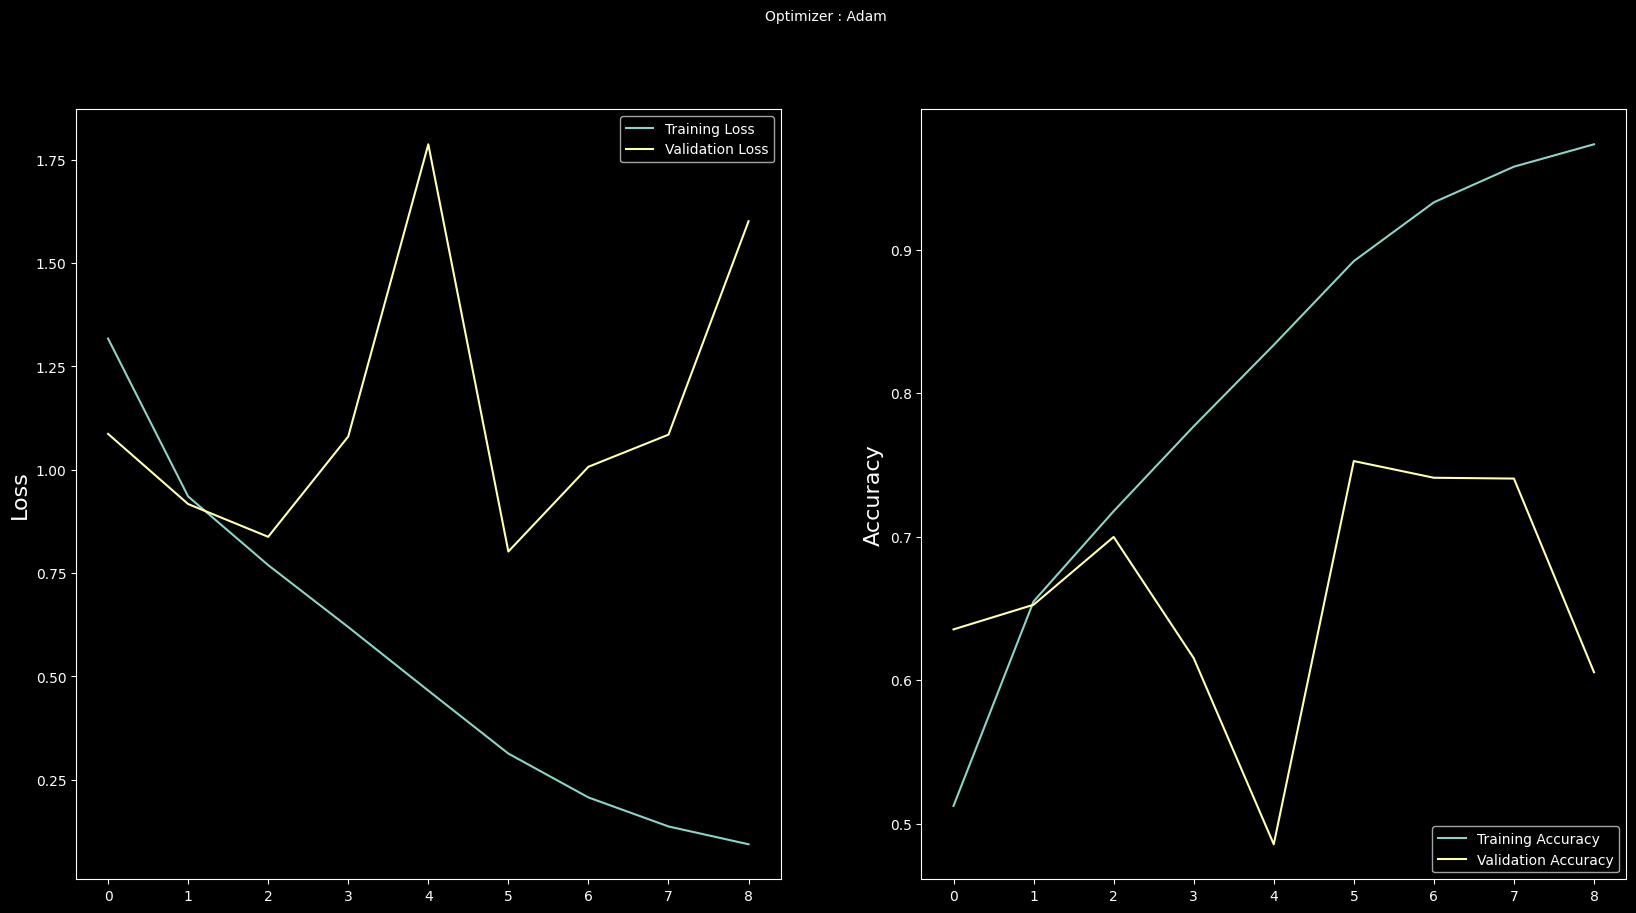

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Saving the model
cnn_model.save("custom_tuned_cnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 3ms/step


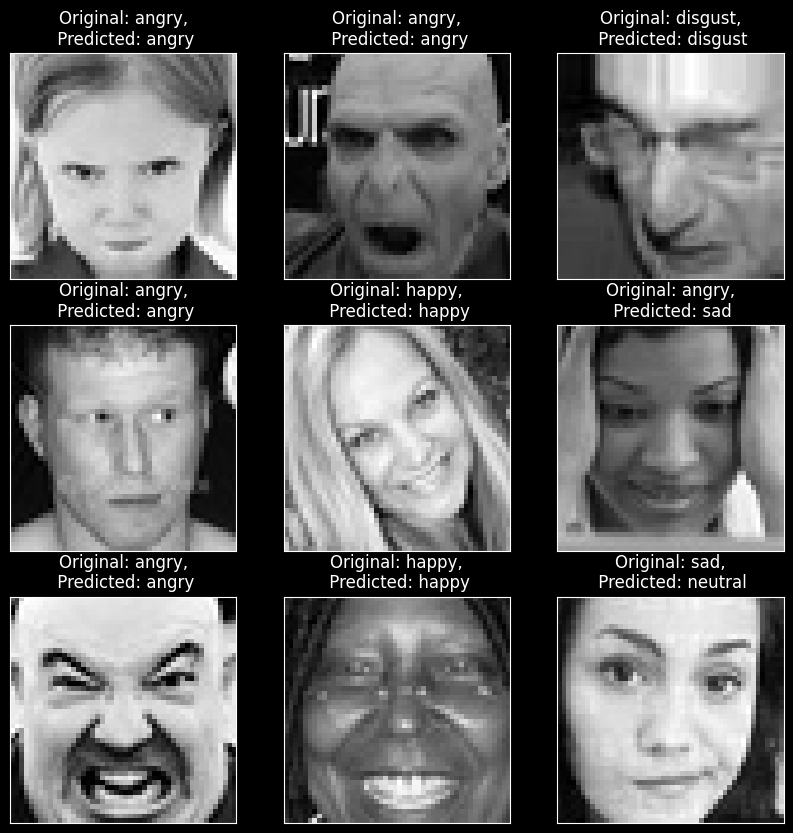

In [ ]:
# Select 9 random images from the train generator
test_images, test_labels = next(train_set)

# Predict the labels of the test images
predicted_labels = cnn_model.predict(test_images)

# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Loop over the test images and predicted labels
for i, ax in enumerate(axes.flat):
  # Display the image
  ax.imshow(test_images[i].reshape((48, 48)), cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])

  # Get the original and predicted labels
  original_label = list(train_set.class_indices.keys())[np.argmax(test_labels[i])]
  predicted_label = list(train_set.class_indices.keys())[np.argmax(predicted_labels[i])]

  # Set the title of the subplot
  ax.set_title(f"Original: {original_label},\n Predicted: {predicted_label}")

# Display the figure
plt.show()

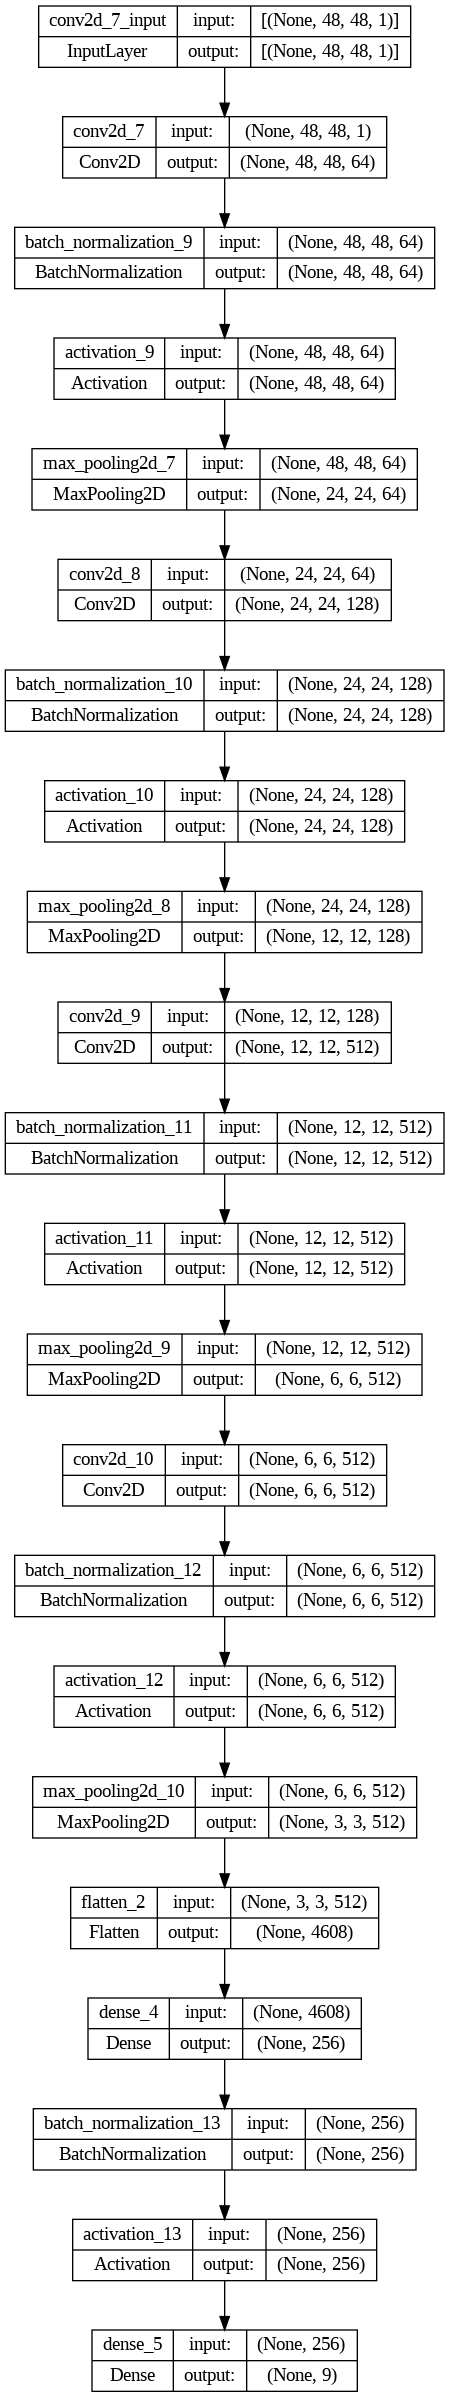

In [ ]:
import numpy as np
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Call the cnn_model with example data
example_input = np.random.rand(128, 48, 48, 1)  # Provide example input
_ = cnn_model(example_input)

# Save the cnn_model architecture as a PNG file
plot_model(cnn_model, to_file='tuned_model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
example_input = np.random.rand(128, 48, 48, 1) # Provide example
_ = cnn_model(example_input)
# Save the cnn_modelel architecture as a PNG file
plot_model(cnn_model, to_file='tuned_modelel_architecture.png',
show_shapes=True, show_layer_names=True)
# Visualize the cnn_modelel
visualkeras.layered_view(cnn_model, to_file='tuned_modelel_architecture.png',
legend=True).show()


#Applying the VGG-19 using the transfer Learning

In [ ]:
batch_size  = 128
folder_path="/kaggle/input/randafer/FER"

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

vgg_train_set = datagen_train.flow_from_directory(folder_path + "/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


vgg_test_set = datagen_val.flow_from_directory(folder_path + "/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "rgb",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 40798 images belonging to 9 classes.
Found 12297 images belonging to 9 classes.


In [ ]:
# prompt: generate the code to train the model using transfer learning model of VGG-19 input images shape are (48, 48, 1) convert the train_set and test_set image size to (48, 48, 3) for the model input

from keras.applications import VGG19

# Load the VGG19 model with pre-trained weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the convolutional layers in the base model
for layer in base_model.layers:
  layer.trainable = False

# Add a new top layer to the model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(no_of_classes, activation='softmax')(x)

# Create the new model
vgg_19 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
vgg_19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = vgg_19.fit(vgg_train_set, steps_per_epoch=vgg_train_set.n // vgg_train_set.batch_size, epochs=epochs, validation_data=vgg_test_set, validation_steps=vgg_test_set.n // vgg_test_set.batch_size, callbacks=callbacks_list)

80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/50
317/318 [============================>.] - ETA: 0s - loss: 4.5103 - accuracy: 0.2246
Epoch 1: val_loss improved from 1.78724 to 1.85976, saving model to cnn_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


318/318 [==============================] - 20s 52ms/step - loss: 4.5037 - accuracy: 0.2247 - val_loss: 1.8598 - val_accuracy: 0.2806 - lr: 0.0010
Epoch 2/50
317/318 [============================>.] - ETA: 0s - loss: 1.9148 - accuracy: 0.2896
Epoch 2: val_loss did not improve from 1.85976
318/318 [==============================] - 16s 49ms/step - loss: 1.9142 - accuracy: 0.2898 - val_loss: 1.6493 - val_accuracy: 0.3818 - lr: 0.0010
Epoch 3/50
318/318 [==============================] - ETA: 0s - loss: 1.7791 - accuracy: 0.3263
Epoch 3: val_loss did not improve from 1.85976
318/318 [==============================] - 16s 50ms/step - loss: 1.7791 - accuracy: 0.3263 - val_loss: 1.5589 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 4/50
318/318 [==============================] - ETA: 0s - loss: 1.6992 - accuracy: 0.3551
Epoch 4: val_loss did not improve from 1.85976
318/318 [==============================] - 16s 50ms/step - loss: 1.6992 - accuracy: 0.3551 - val_loss: 1.5268 - val_accuracy: 0.4460 

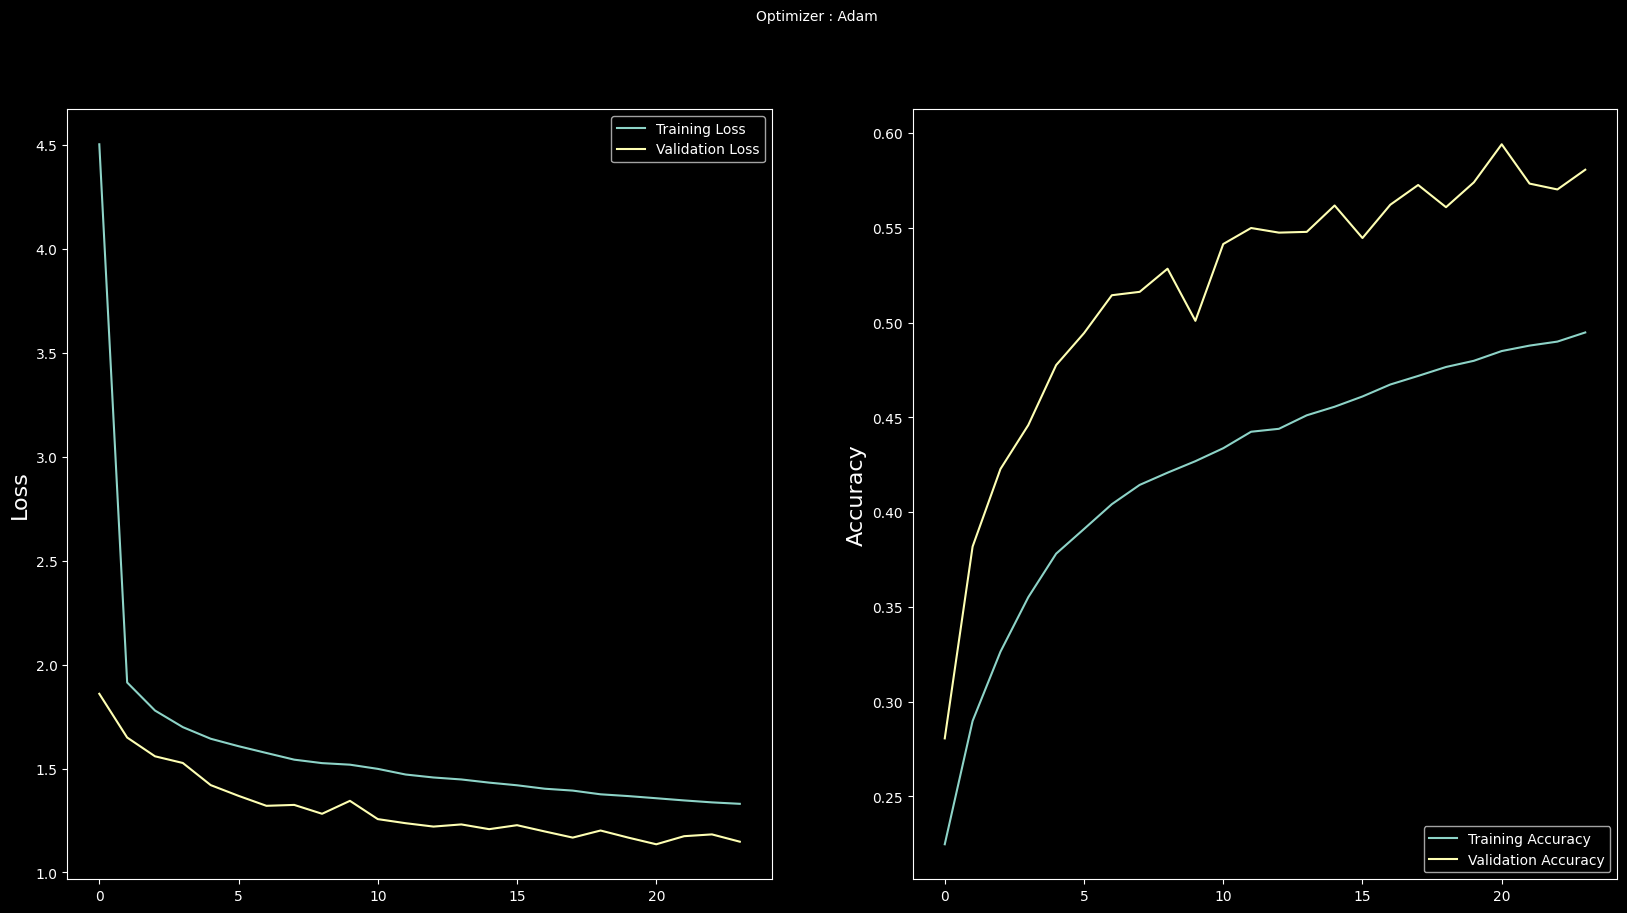

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save the model
vgg_19.save("vgg19_model_transfer.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 6ms/step


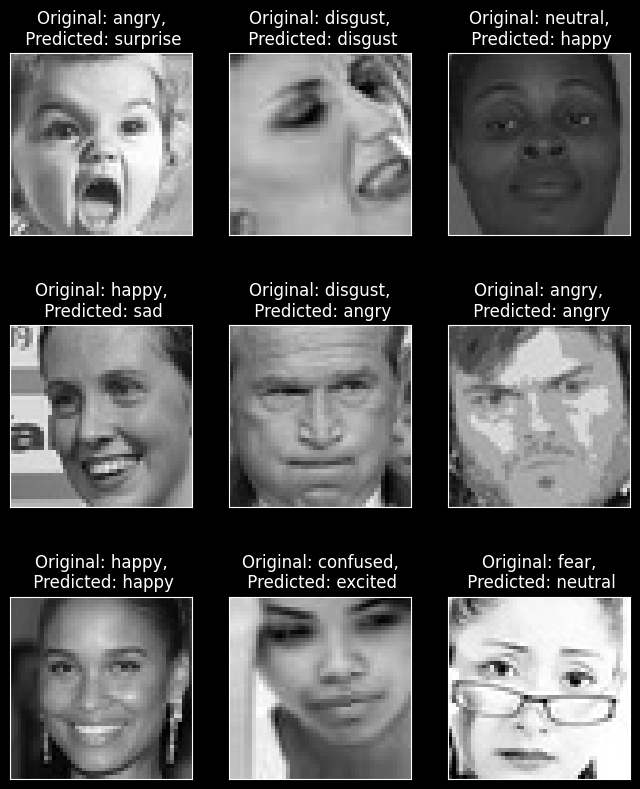

In [ ]:
# Select 9 random images from the train generator
test_images, test_labels = next(vgg_train_set)

# Predict the labels of the test images
predicted_labels = vgg_19.predict(test_images)

# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(8, 10))

# Loop over the test images and predicted labels
for i, ax in enumerate(axes.flat):

  # Display the image
  ax.imshow(test_images[i] / 255)
  ax.set_xticks([])
  ax.set_yticks([])

  # Get the original and predicted labels
  original_label = list(vgg_train_set.class_indices.keys())[np.argmax(test_labels[i])]
  predicted_label = list(vgg_train_set.class_indices.keys())[np.argmax(predicted_labels[i])]

  # Set the title of the subplot
  ax.set_title(f"Original: {original_label},\n Predicted: {predicted_label}")

# Display the figure
plt.show()


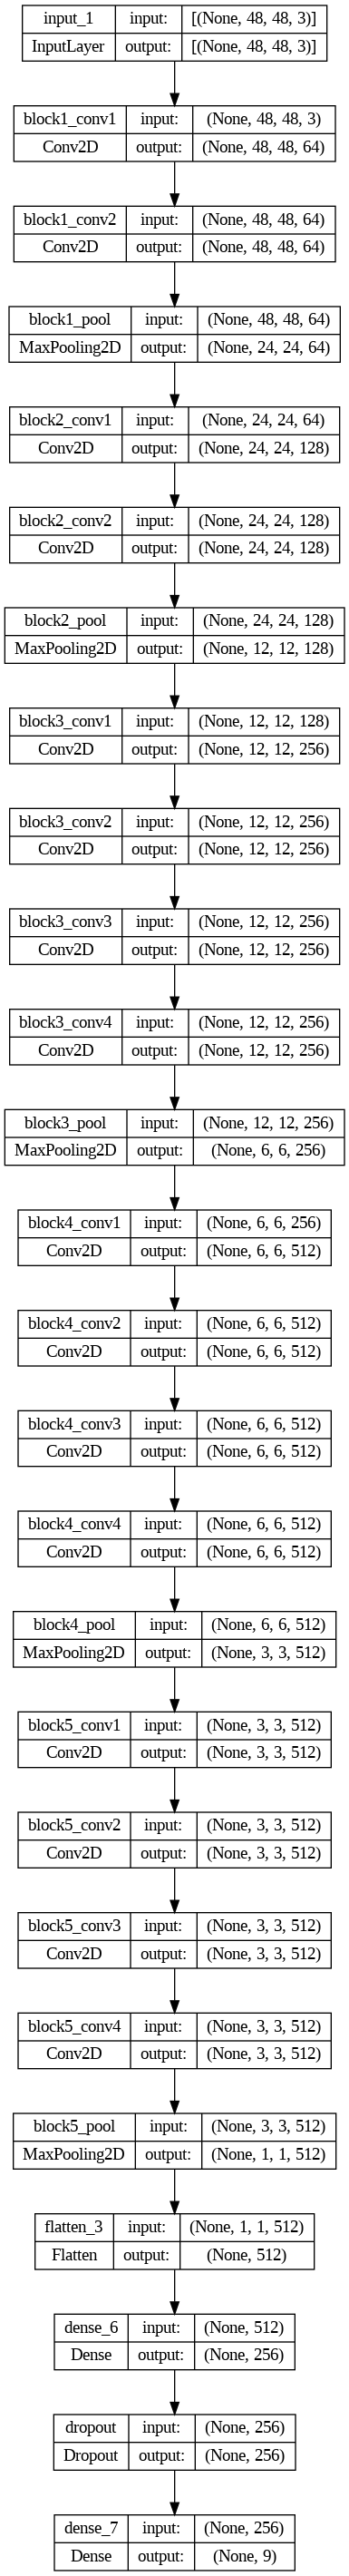

In [ ]:
import numpy as np
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Call the cnn_model with example data
example_input = np.random.rand(batch_size, 48, 48, 3)  # Provide example input
_ = vgg_19(example_input)

# Save the vgg_19 architecture as a PNG file
plot_model(vgg_19, to_file='vgg_19_model_architecture.png', show_shapes=True, show_layer_names=True)



In [ ]:
example_input = np.random.rand(128, 48, 48, 3) # Provide example
_ = vgg_19(example_input)
# Save the vgg_19el architecture as a PNG file
plot_model(vgg_19, to_file='vgg_19_modelel_architecture.png',
show_shapes=True, show_layer_names=True)
# Visualize the vgg_19el
visualkeras.layered_view(vgg_19, to_file='vgg_19_modelel_architecture.png',
legend=True).show()


#Applying the ResNet Model using the transfer Learning

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

resnet_train_set = datagen_train.flow_from_directory(folder_path + "/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


resnet_test_set = datagen_val.flow_from_directory(folder_path + "/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "rgb",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 40798 images belonging to 9 classes.
Found 12297 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.applications import ResNet101

# Load pre-trained ResNet50 model (without including top layers)
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(no_of_classes, activation='softmax')(x)

# Combine base model with custom top layers
resnet = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the resnet summary
resnet.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                     

In [ ]:
# Train the model
history = resnet.fit(resnet_train_set, steps_per_epoch=resnet_train_set.n // resnet_train_set.batch_size,
                     epochs=epochs, validation_data=resnet_test_set,
                     validation_steps=resnet_test_set.n // resnet_test_set.batch_size,
                     callbacks=callbacks_list)

Epoch 1/50
318/318 [==============================] - ETA: 0s - loss: 1.8210 - accuracy: 0.4178
Epoch 1: val_loss did not improve from 1.85976
318/318 [==============================] - 26s 61ms/step - loss: 1.8210 - accuracy: 0.4178 - val_loss: 1.2029 - val_accuracy: 0.5537 - lr: 0.0010
Epoch 2/50
317/318 [============================>.] - ETA: 0s - loss: 1.3002 - accuracy: 0.5134
Epoch 2: val_loss did not improve from 1.85976
318/318 [==============================] - 16s 51ms/step - loss: 1.3007 - accuracy: 0.5132 - val_loss: 1.2180 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 3/50
317/318 [============================>.] - ETA: 0s - loss: 1.1830 - accuracy: 0.5626
Epoch 3: val_loss did not improve from 1.85976
318/318 [==============================] - 17s 52ms/step - loss: 1.1828 - accuracy: 0.5625 - val_loss: 1.0351 - val_accuracy: 0.6207 - lr: 0.0010
Epoch 4/50
317/318 [============================>.] - ETA: 0s - loss: 1.0926 - accuracy: 0.5981
Epoch 4: val_loss did not improve fro

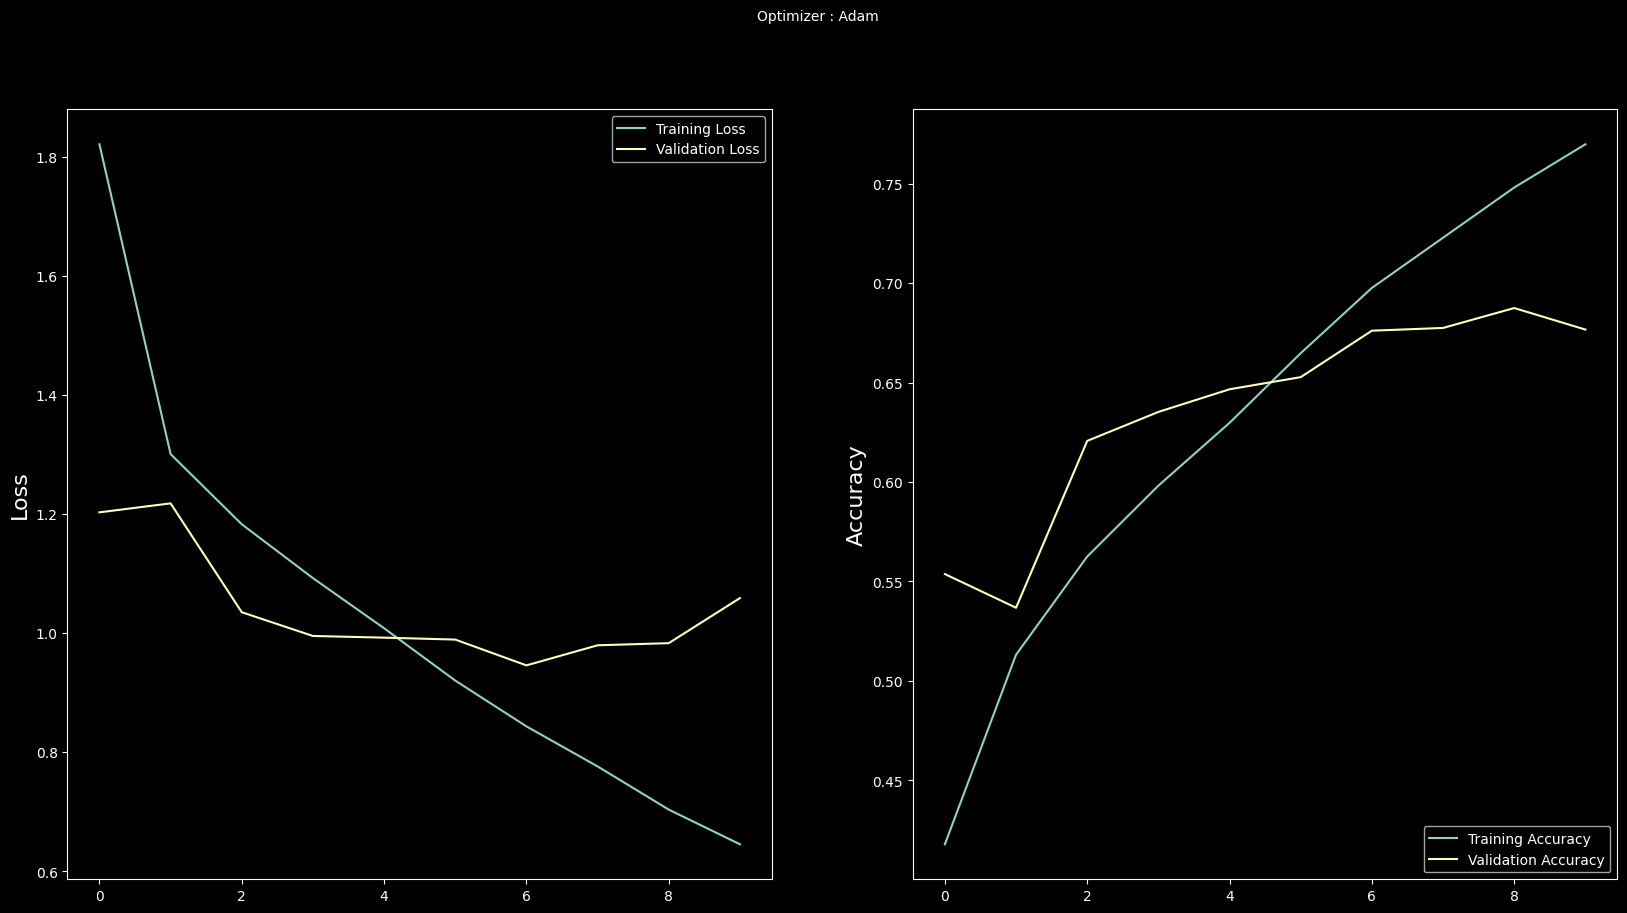

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save the model
resnet.save("resnet_model_transfer.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 2s 13ms/step


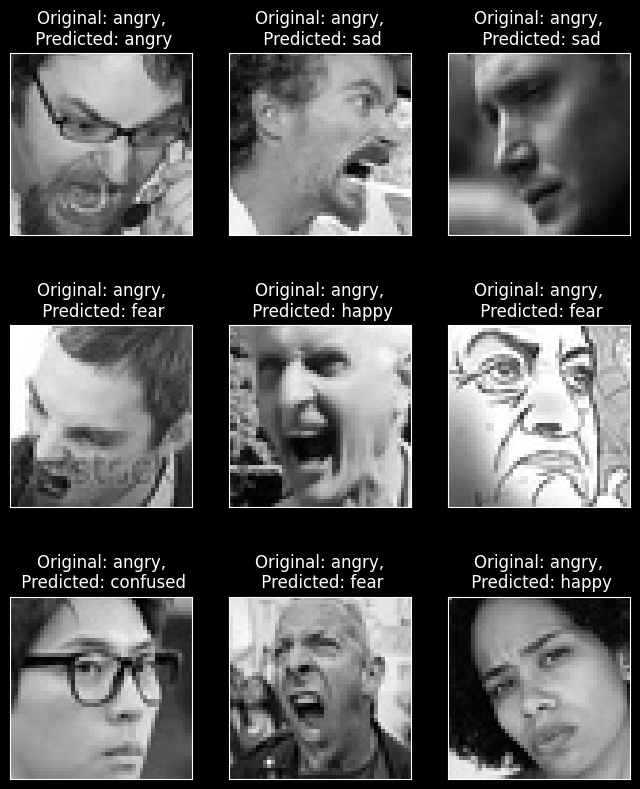

In [ ]:
# Select 9 random images from the train generator
test_images, test_labels = next(resnet_test_set)

# Predict the labels of the test images
predicted_labels = resnet.predict(test_images)

# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(8, 10))

# Loop over the test images and predicted labels
for i, ax in enumerate(axes.flat):

  # Display the image
  ax.imshow(test_images[i] / 255)
  ax.set_xticks([])
  ax.set_yticks([])

  # Get the original and predicted labels
  original_label = list(resnet_train_set.class_indices.keys())[np.argmax(test_labels[i])]
  predicted_label = list(resnet_train_set.class_indices.keys())[np.argmax(predicted_labels[i])]

  # Set the title of the subplot
  ax.set_title(f"Original: {original_label},\n Predicted: {predicted_label}")

# Display the figure
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.871718 to fit



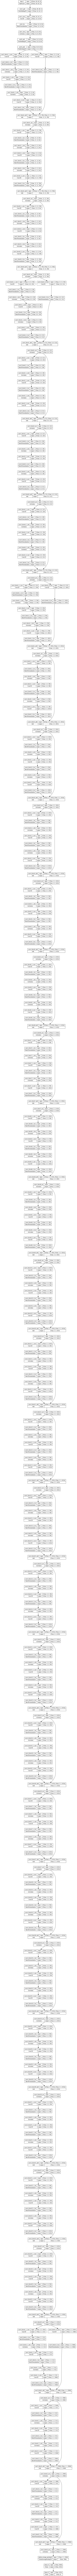

In [ ]:
import numpy as np
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Call the cnn_model with example data
example_input = np.random.rand(128, 48, 48, 3)  # Provide example input
_ = resnet(example_input)

# Save the resnet architecture as a PNG file
plot_model(resnet, to_file='resnet_model_architecture.png', show_shapes=True, show_layer_names=True)



In [ ]:
example_input = np.random.rand(128, 48, 48, 3) # Provide example
_ = resnet(example_input)
# Save the resnetel architecture as a PNG file
plot_model(resnet, to_file='resnet_modelel_architecture.png',
show_shapes=True, show_layer_names=True)
# Visualize the resnetel
visualkeras.layered_view(resnet, to_file='resnet_modelel_architecture.png',
legend=True).show()


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.871718 to fit



#Making prediction over the test data from models saved

In [ ]:
# loading both of the cnn and vgg19 model and performing comparison results
from tensorflow.keras.models import load_model

cnn_model = load_model("simple_cnn.h5")
fine_tuned_model = load_model("custom_tuned_cnn.h5")
vgg_19 = load_model("vgg19_model_transfer.h5")
resnet = load_model("resnet_model_transfer.h5")

# Making prediction over the custom simple cnn model
test_images, test_labels = next(train_set)
cnn_prediction = cnn_model.predict(test_images)
cnn_test_labels = [np.argmax(i) for i in test_labels]
cnn_prediction = [np.argmax(i) for i in cnn_prediction]

# Making prediction over the custom fine tuned cnn model
test_images, test_labels = next(train_set)
fine_tuned_cnn_prediction = fine_tuned_model.predict(test_images)
fine_tuned_cnn_test_labels = [np.argmax(i) for i in test_labels]
fine_tuned_cnn_predictions = [np.argmax(i) for i in fine_tuned_cnn_prediction]

# Making prediction over the vgg-19 cnn model
test_images, test_labels = next(vgg_train_set)
vgg_19_prediction = vgg_19.predict(test_images)
vgg_19_test_labels = [np.argmax(i) for i in test_labels]
vgg_19_prediction = [np.argmax(i) for i in vgg_19_prediction]

# Making prediction over the resnet cnn model
test_images, test_labels = next(vgg_train_set)
resnet_prediction = resnet.predict(test_images)
resnet_test_labels = [np.argmax(i) for i in test_labels]
resnet_prediction = [np.argmax(i) for i in resnet_prediction]

4/4 [==============================] - 2s 12ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score

# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== CNN ==========

Accuracy on validation set: 0.8125

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89        12
           3       1.00      1.00      1.00         5
           4       0.56      0.71      0.63        14
           5       1.00      0.90      0.95        20
           6       0.72      0.86      0.78        21
           7       0.78      0.54      0.64        13
           8       0.83      0.71      0.77        14

    accuracy                           0.81       128
   macro avg       0.84      0.82      0.83       128
weighted avg       0.83      0.81      0.81       128


Confusion Matrix : 
 [[18  0  0  0  1  0  3  0  0]
 [ 0  6  1  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0]
 [ 0  0  1  0 10  0  1  1  1]
 [ 0  0  1  0  1 18  0  0  0]
 [ 1

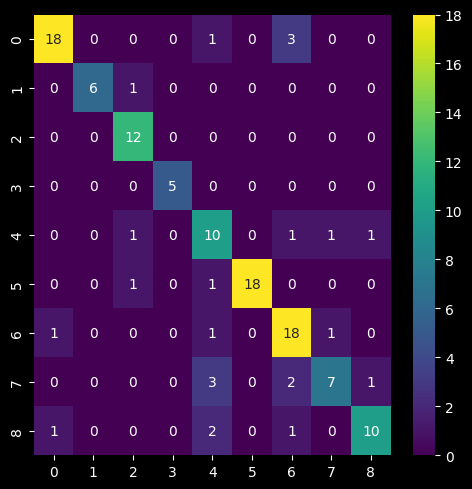

========== Fine tuned CNN ==========

Accuracy on validation set: 0.9453

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         9
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00         2
           4       0.91      0.83      0.87        12
           5       1.00      0.97      0.98        29
           6       0.85      0.94      0.89        18
           7       0.82      0.93      0.87        15
           8       1.00      0.92      0.96        12

    accuracy                           0.95       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.95      0.95      0.95       128


Confusion Matrix : 
 [[16  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  1  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0 10  0  1  1  0]
 [ 0  0  0  0  0 28  1 

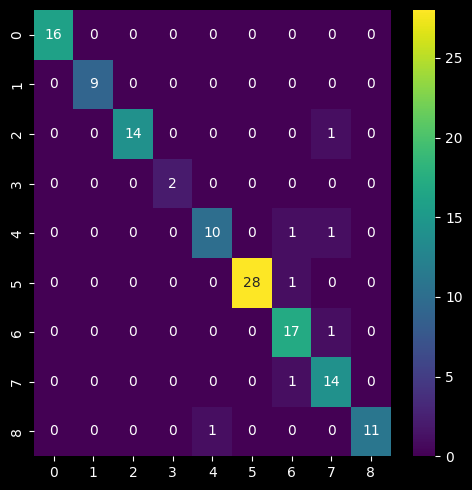

========== VGG-19 ==========

Accuracy on validation set: 0.5859

Classification report : 
               precision    recall  f1-score   support

           0       0.48      0.60      0.53        20
           1       0.91      1.00      0.95        10
           2       0.94      0.88      0.91        17
           3       0.60      1.00      0.75         3
           4       0.50      0.11      0.17        19
           5       0.39      0.74      0.51        19
           6       0.53      0.42      0.47        19
           7       0.71      0.38      0.50        13
           8       0.67      0.75      0.71         8

    accuracy                           0.59       128
   macro avg       0.64      0.65      0.61       128
weighted avg       0.61      0.59      0.56       128


Confusion Matrix : 
 [[12  0  0  0  1  5  1  0  1]
 [ 0 10  0  0  0  0  0  0  0]
 [ 0  0 15  1  0  1  0  0  0]
 [ 0  0  0  3  0  0  0  0  0]
 [ 4  0  0  0  2  9  1  2  1]
 [ 2  0  1  0  0 14  2  0  0]
 

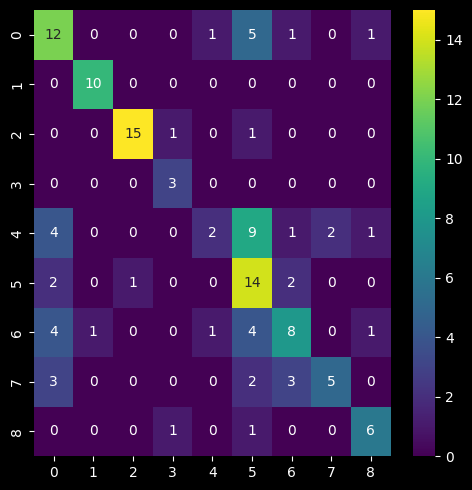

========== ResNet ==========

Accuracy on validation set: 0.7891

Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        22
           1       1.00      1.00      1.00         9
           2       0.87      0.93      0.90        14
           3       1.00      1.00      1.00        13
           4       0.50      0.58      0.54        12
           5       0.67      1.00      0.80        12
           6       0.75      0.55      0.63        11
           7       0.84      0.73      0.78        22
           8       0.90      0.69      0.78        13

    accuracy                           0.79       128
   macro avg       0.81      0.80      0.80       128
weighted avg       0.80      0.79      0.79       128


Confusion Matrix : 
 [[16  0  0  0  2  3  0  0  1]
 [ 0  9  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  1  0  0  0]
 [ 0  0  0 13  0  0  0  0  0]
 [ 2  0  1  0  7  0  0  2  0]
 [ 0  0  0  0  0 12  0  0  0]
 

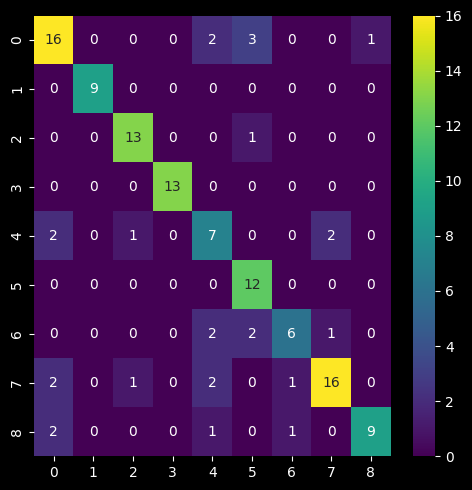

In [ ]:
cnn_results = modelEvaluation(cnn_prediction, cnn_test_labels, 'CNN')
fine_tuned_cnn_results = modelEvaluation(fine_tuned_cnn_predictions, fine_tuned_cnn_test_labels, 'Fine tuned CNN')
vgg_19_results = modelEvaluation(vgg_19_prediction, vgg_19_test_labels, 'VGG-19')
resnet_results = modelEvaluation(resnet_prediction, resnet_test_labels, 'ResNet')

#Results Comparison

In [ ]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Simple CNN' : cnn_results,
    'Fine Tunned' : fine_tuned_cnn_results,
    'VGG-19' : vgg_19_results,
    'ResNet' : resnet_results
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')

# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+--------------+---------------+----------+----------+
| Metrics   |   Simple CNN |   Fine Tunned |   VGG-19 |   ResNet |
|-----------+--------------+---------------+----------+----------|
| accuracy  |     0.8125   |      0.945312 | 0.585938 | 0.789062 |
| precision |     0.842963 |      0.953624 | 0.636641 | 0.805857 |
| recall    |     0.822167 |      0.947403 | 0.653347 | 0.800468 |
| f1-score  |     0.82552  |      0.949311 | 0.611587 | 0.795218 |
+-----------+--------------+---------------+----------+----------+


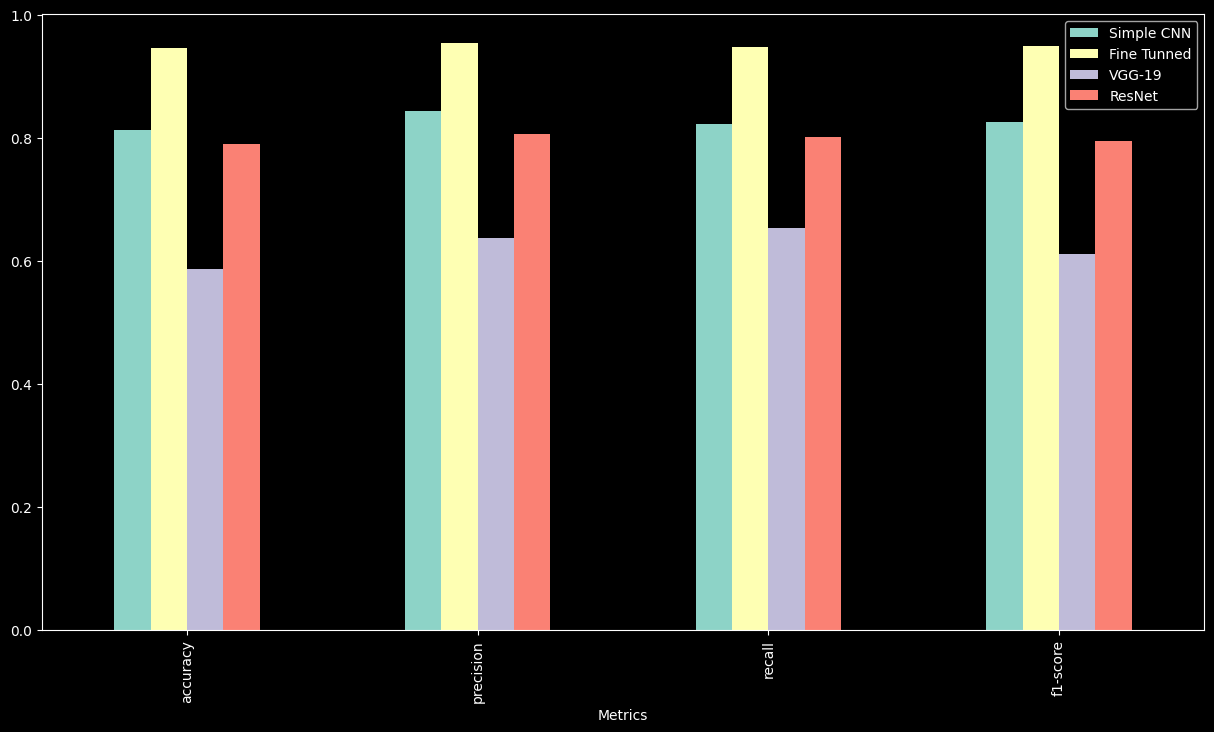

In [ ]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

#Making a single prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


for cnn_model and fine_tuned_cnn_model

1/1 [==============================] - 0s 23ms/step
VGG19 Prediction: angry


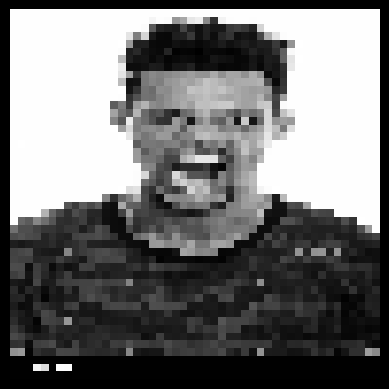

1/1 [==============================] - 0s 29ms/step
ResNet Prediction: angry


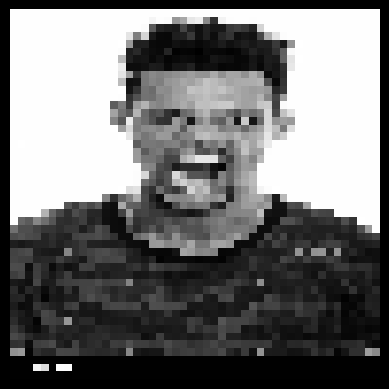

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the models
cnn_model = load_model('/content/simple_cnn.h5')
fine_tuned_cnn_model = load_model('/content/custom_tuned_cnn.h5')

# Define class labels
class_labels = {0: 'angry', 1: 'excited', 2: 'happy', 3: 'neutral', 4: 'surprise',
                5: 'sad', 6: 'disgust', 7: 'fear', 8: 'confused'}
# Function to predict label for a single image
def predict_label(image_path, model):
    img = image.load_img(image_path, target_size=(48, 48, 3))  # Load image with RGB channels
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize image to range [0, 1]
    result = model.predict(img)
    predicted_label_index = np.argmax(result)
    predicted_class_name = class_labels[predicted_label_index]
    return predicted_class_name, img

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/CV/FERRan/FER/Prediction/angry.jpg'

# Make predictions using each model
for model_name, model in [('VGG19', vgg19_model), ('ResNet', resnet_model)]:
    predicted_label, img = predict_label(image_path, model)
    print(f"{model_name} Prediction: {predicted_label}")
    plt.imshow(img.squeeze())
    plt.axis('off')
    plt.show()


for VGG_19 model and ResNet_model

1/1 [==============================] - 0s 180ms/step
VGG19 Prediction: sad


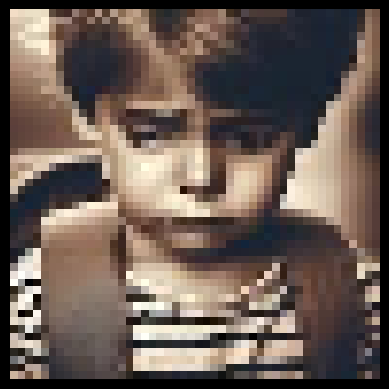

1/1 [==============================] - 2s 2s/step
ResNet Prediction: fear


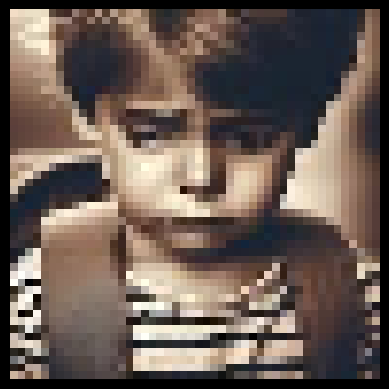

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the models
vgg19_model = load_model('/content/vgg19_model_transfer.h5')
resnet_model = load_model('/content/resnet_model_transfer.h5')

# Define class labels
class_labels = {0: 'angry', 1: 'excited', 2: 'happy', 3: 'neutral', 4: 'surprise',
                5: 'sad', 6: 'disgust', 7: 'fear', 8: 'confused'}

# Function to predict label for a single image
def predict_label(image_path, model):
    # Load the image and convert it to RGB format
    img = image.load_img(image_path, target_size=(48, 48))
    img = img.convert('RGB')

    # Convert the image to array and expand dimensions
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    # Make predictions
    result = model.predict(img)
    predicted_label_index = np.argmax(result)
    predicted_class_name = class_labels[predicted_label_index]
    return predicted_class_name, img

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/CV/FERRan/FER/Prediction/s.jpg'

# Make predictions using each model
for model_name, model in [('VGG19', vgg19_model), ('ResNet', resnet_model)]:
    predicted_label, img = predict_label(image_path, model)
    print(f"{model_name} Prediction: {predicted_label}")
    plt.imshow(img.squeeze().astype(np.uint8))
    plt.axis('off')
    plt.show()
